In [1]:
import pandas as pd
from skimage import io, transform
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np
%matplotlib inline

In [2]:
#load a list of images from csv
images_df = pd.read_csv('Image_Paths.csv')

#create dataframes for each category for training set, validation set, and all images
train_land = images_df[(images_df.Category == 'landscape') & (images_df.Train_Val == 'train')]['File_Path']
train_animal = images_df[(images_df.Category == 'animals') & (images_df.Train_Val == 'train')]['File_Path']
train_people = images_df[(images_df.Category == 'people') & (images_df.Train_Val == 'train')]['File_Path']
train_plants = images_df[(images_df.Category == 'plants') & (images_df.Train_Val == 'train')]['File_Path']

val_land = images_df[(images_df.Category == 'landscape') & (images_df.Train_Val == 'val')]['File_Path']
val_animal = images_df[(images_df.Category == 'animals') & (images_df.Train_Val == 'val')]['File_Path']
val_people = images_df[(images_df.Category == 'people') & (images_df.Train_Val == 'val')]['File_Path']
val_plants = images_df[(images_df.Category == 'plants') & (images_df.Train_Val == 'val')]['File_Path']

all_land = train_land.append(val_land)
all_animal = train_animal.append(val_animal)
all_people = train_people.append(val_people)
all_plants = train_plants.append(val_plants)


In [3]:
#create a list of tuples containing a dataframe, plot title
images_list = ((train_land, 'Training Landscapes'), (train_animal, 'Training Animals'), 
               (train_people, 'Training People'), (train_plants, 'Training Plants'), 
               (val_land, 'Validation Landscapes'), (val_animal, 'Validation Animals'), 
               (val_people, 'Validation People'), (val_plants, 'Validation Plants'), 
               (all_land, 'All Landscapes'), (all_animal, 'All Animals'), 
               (all_people, 'All People'), (all_plants, 'All Plants'))


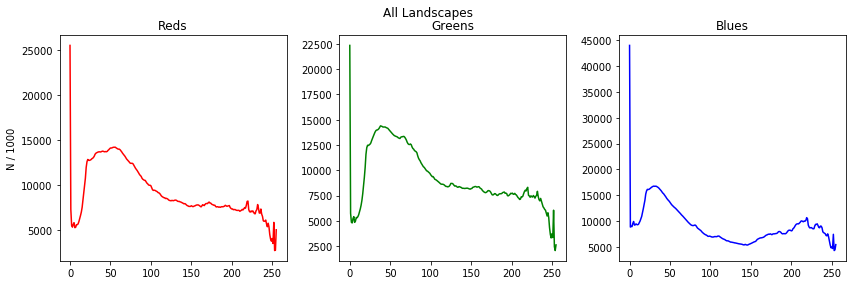

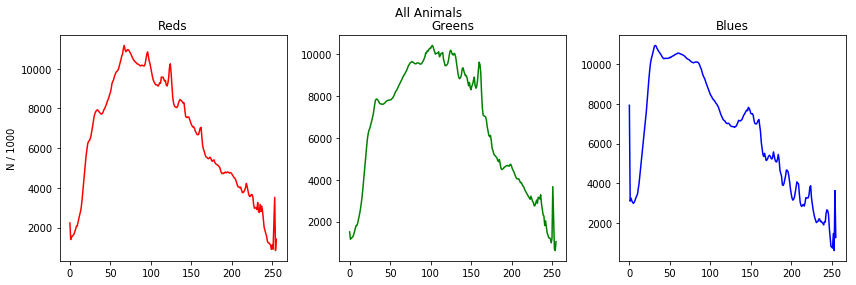

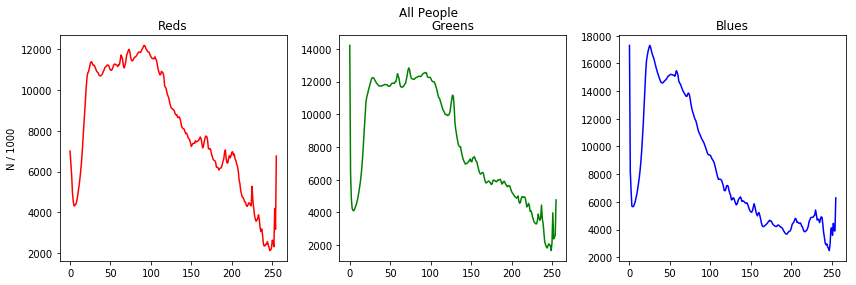

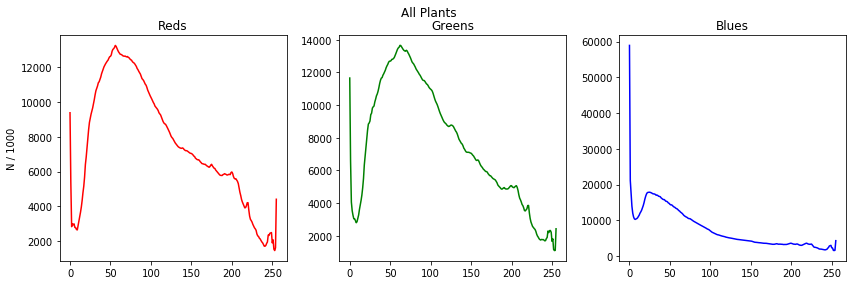

In [4]:
#iterate over images_list to make red, green, and blue color channel plots
#for this cell we will only do the "all" images set
for s, plot_title in images_list[-4:]:
    #instantiate epty dictionaries for each color channel
    reds_dict = defaultdict(int)
    greens_dict = defaultdict(int)
    blues_dict = defaultdict(int)
    
    #instantiate a 1x3 subplot
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12,4))    
    
    #iterate over image paths in the active series
    for idx, image_path in s.iteritems():
        image = io.imread(image_path)
        
        #separate out red, green, and blue color channels into their own arrays
        reds = image[:,:, 0]
        greens = image[:,:, 1]
        blues = image[:,:, 2]
        
        #iterate over each pixel in color arrays. Sum up the number of times each color value is used
        for i in reds.flat:
            reds_dict[i] += 1
        
        for i in greens.flat:
            greens_dict[i] += 1
        
        for i in blues.flat:
            blues_dict[i] += 1
      
      #if making plots of % then get total number of pixels
#     red_total = sum(reds_dict.values(), 0.0)
#     green_total = sum(greens_dict.values(), 0.0)
#     blue_total = sum(blues_dict.values(), 0.0)
    
    #divide all pixel count values by 1000 (to scale)
    reds_dict = {k: v/1000 for k, v in reds_dict.items()}
    greens_dict = {k: v/1000 for k, v in greens_dict.items()}
    blues_dict = {k: v/1000 for k, v in blues_dict.items()}
    
    #plot each color on it's own sub-plot
    ax1.plot(*zip(*sorted(reds_dict.items())), color='r', linestyle='-')
    ax1.set_title('Reds')
    ax1.set_ylabel("N / 1000")

    ax2.plot(*zip(*sorted(greens_dict.items())), color='g', linestyle='-')
    ax2.set_title('Greens')

    
    ax3.plot(*zip(*sorted(blues_dict.items())), color='b', linestyle='-')
    ax3.set_title('Blues')

    
    fig.suptitle(plot_title)    
    plt.tight_layout()    
    fig.subplots_adjust(top=0.88)
    plt.show()
#     display.display(plt.gcf())
#     display.clear_output(wait=True)
    

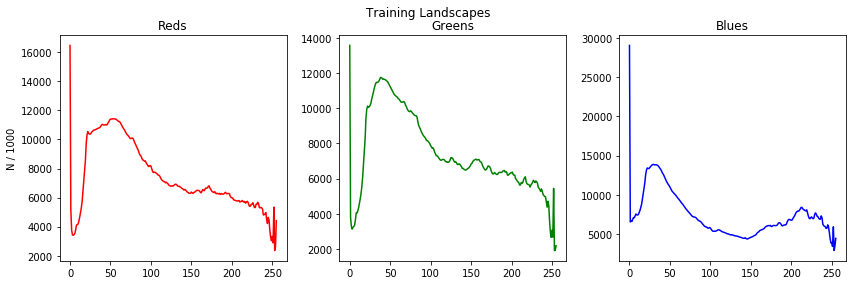

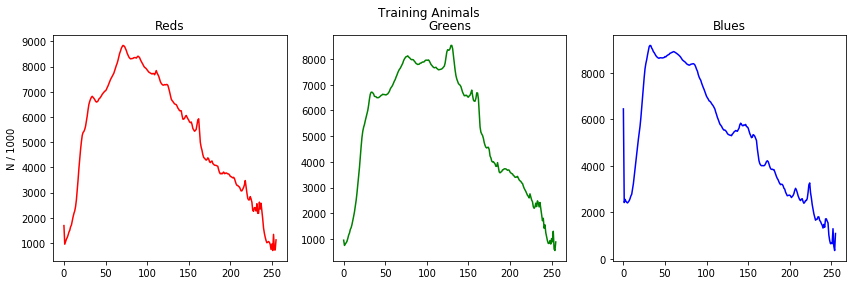

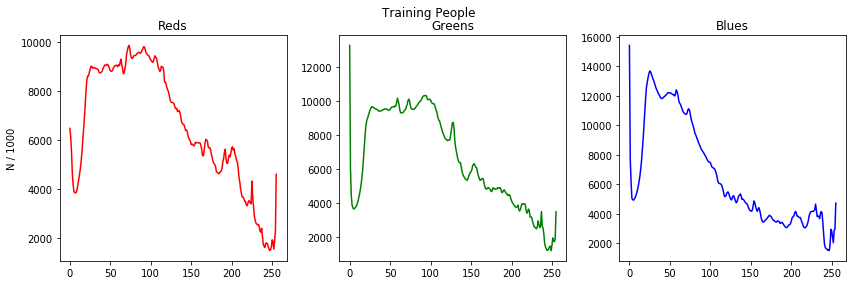

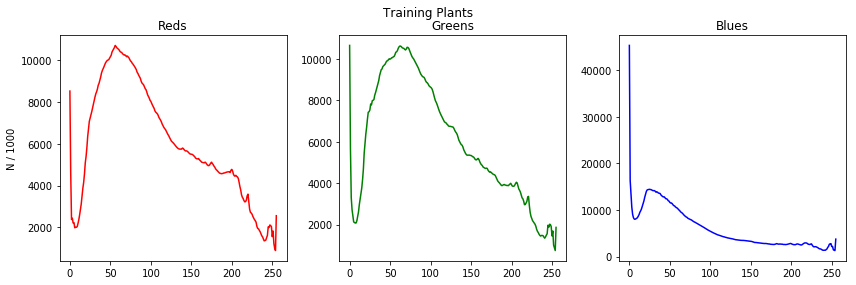

In [5]:
#iterate over images_list to make red, green, and blue color channel plots
#for this cell we will only do the "training" images set
for s, plot_title in images_list[0:4]:
    #instantiate epty dictionaries for each color channel
    reds_dict = defaultdict(int)
    greens_dict = defaultdict(int)
    blues_dict = defaultdict(int)
    
    #instantiate a 1x3 subplot
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12,4))    
    
    #iterate over image paths in the active series
    for idx, image_path in s.iteritems():
        image = io.imread(image_path)
        
        #separate out red, green, and blue color channels into their own arrays
        reds = image[:,:, 0]
        greens = image[:,:, 1]
        blues = image[:,:, 2]
        
        #iterate over each pixel in color arrays. Sum up the number of times each color value is used
        for i in reds.flat:
            reds_dict[i] += 1
        
        for i in greens.flat:
            greens_dict[i] += 1
        
        for i in blues.flat:
            blues_dict[i] += 1
      
      #if making plots of % then get total number of pixels
#     red_total = sum(reds_dict.values(), 0.0)
#     green_total = sum(greens_dict.values(), 0.0)
#     blue_total = sum(blues_dict.values(), 0.0)
    
    #divide all pixel count values by 1000 (to scale)
    reds_dict = {k: v/1000 for k, v in reds_dict.items()}
    greens_dict = {k: v/1000 for k, v in greens_dict.items()}
    blues_dict = {k: v/1000 for k, v in blues_dict.items()}

    #plot each color on it's own sub-plot
    ax1.plot(*zip(*sorted(reds_dict.items())), color='r', linestyle='-')
    ax1.set_title('Reds')
    ax1.set_ylabel("N / 1000")
    
    ax2.plot(*zip(*sorted(greens_dict.items())), color='g', linestyle='-')
    ax2.set_title('Greens')
    
    ax3.plot(*zip(*sorted(blues_dict.items())), color='b', linestyle='-')
    ax3.set_title('Blues')
    
    fig.suptitle(plot_title)    
    plt.tight_layout()    
    fig.subplots_adjust(top=0.88)
    plt.show()    
    

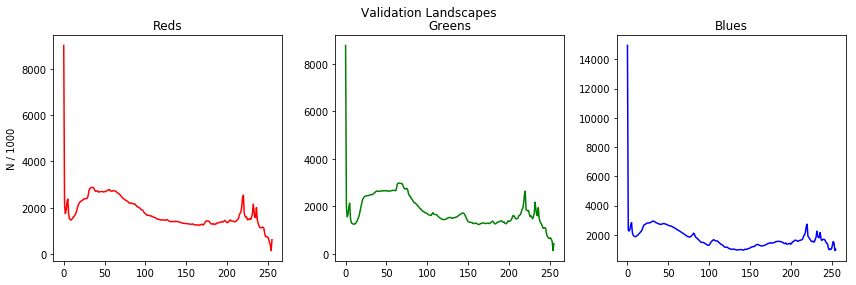

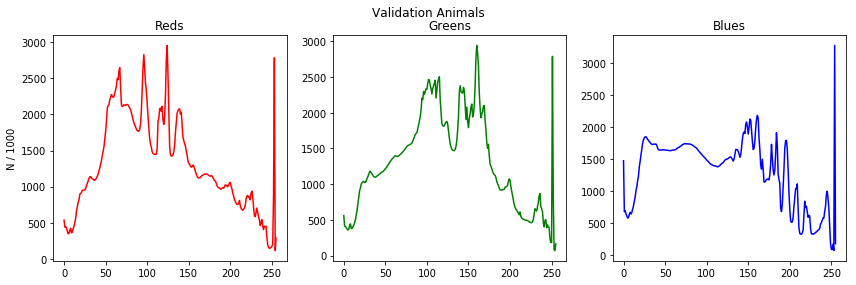

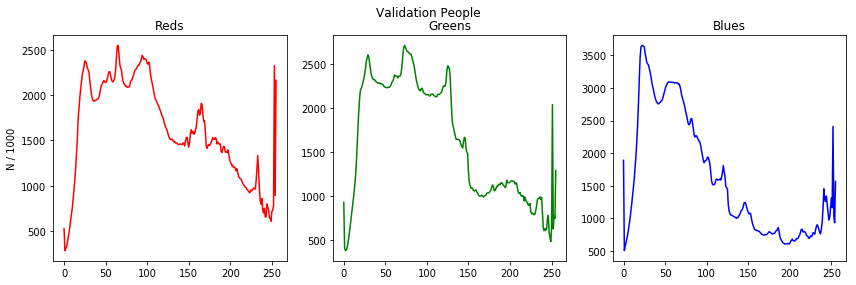

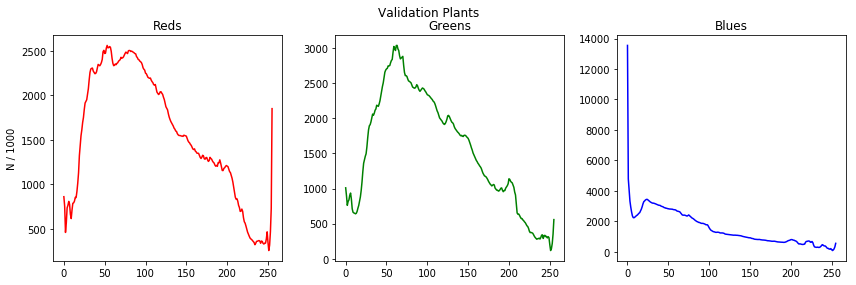

In [6]:
#iterate over images_list to make red, green, and blue color channel plots
#for this cell we will only do the "validation" images set
for s, plot_title in images_list[4:-4]:
    #instantiate epty dictionaries for each color channel
    reds_dict = defaultdict(int)
    greens_dict = defaultdict(int)
    blues_dict = defaultdict(int)
    
    #instantiate a 1x3 subplot
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12,4))    
    
    #iterate over image paths in the active series
    for idx, image_path in s.iteritems():
        image = io.imread(image_path)
        
        #separate out red, green, and blue color channels into their own arrays
        reds = image[:,:, 0]
        greens = image[:,:, 1]
        blues = image[:,:, 2]
        
        #iterate over each pixel in color arrays. Sum up the number of times each color value is used
        for i in reds.flat:
            reds_dict[i] += 1
        
        for i in greens.flat:
            greens_dict[i] += 1
        
        for i in blues.flat:
            blues_dict[i] += 1
      
      #if making plots of % then get total number of pixels
#     red_total = sum(reds_dict.values(), 0.0)
#     green_total = sum(greens_dict.values(), 0.0)
#     blue_total = sum(blues_dict.values(), 0.0)
    
    #divide all pixel count values by 1000 (to scale)
    reds_dict = {k: v/1000 for k, v in reds_dict.items()}
    greens_dict = {k: v/1000 for k, v in greens_dict.items()}
    blues_dict = {k: v/1000 for k, v in blues_dict.items()}

    #plot each color on it's own sub-plot
    ax1.plot(*zip(*sorted(reds_dict.items())), color='r', linestyle='-')
    ax1.set_title('Reds')
    ax1.set_ylabel("N / 1000")   
    
    ax2.plot(*zip(*sorted(greens_dict.items())), color='g', linestyle='-')
    ax2.set_title('Greens')
    
    ax3.plot(*zip(*sorted(blues_dict.items())), color='b', linestyle='-')
    ax3.set_title('Blues')

    
    fig.suptitle(plot_title)    
    plt.tight_layout()    
    fig.subplots_adjust(top=0.88)
    plt.show()    